In [108]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge, \
    momentum_gradient_descent_OLS, momentum_gradient_descent_Ridge, \
        ADAGrad_gradient_descent_OLS, ADAGrad_gradient_descent_Ridge, \
        RMSProp_gradient_descent_OLS, RMSProp_gradient_descent_Ridge
from OLS import OLS_parameters
from Ridge import Ridge_parameters

### Testing Gradient descent with momentum, OLS

In [66]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8
# Momentum
mom = 0.9

eta = 1e-1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_OLS(X_train_s, y_train, eta=eta, momentum=mom, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.03172387 -2.1695152   0.2119452   6.17706811 -0.40514469 -7.10104355
  0.22889341  2.86482598]
Number of iterations: 70826
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [ True  True  True  True  True  True  True  True].
Tolerance = 0.001


## Calculating parameters, gradient descent with momentum, OLS

In [51]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables, lists:
deg_max = 15
MSE_closed_form = []
MSE_gradient_descent = []
R2_score_closed_form=[]
R2_score_gradient_descent = []
num_iterations = []
eta = 1e-1
mom = 0.9

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    beta_gd, t = momentum_gradient_descent_OLS(X_train_s, y_train, eta = eta, momentum=mom, num_iters=100000)
    num_iterations.append(t)
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Add to predictions
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd = X_test_s @ beta_gd + y_offset
    
    # Append MSEs
    MSE_closed_form.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gradient_descent.append(mean_squared_error(y_test, y_pred_gd))
    
    # Append R2 scores
    R2_score_closed_form.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_score_gradient_descent.append(r2_score(y_true=y_test, y_pred = y_pred_gd))

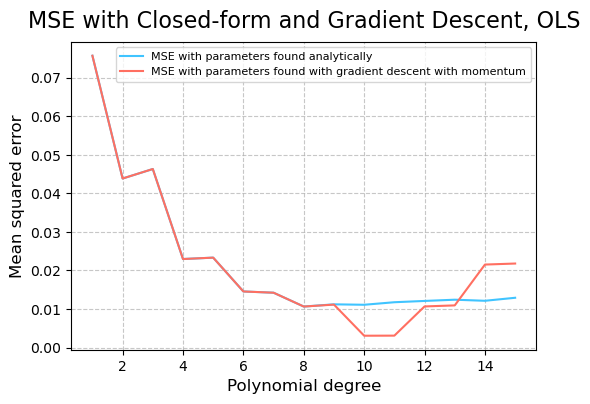

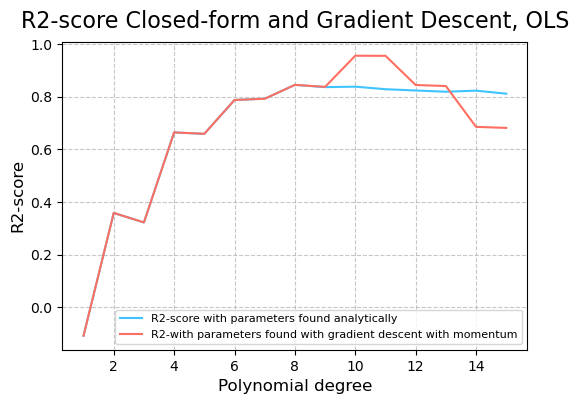

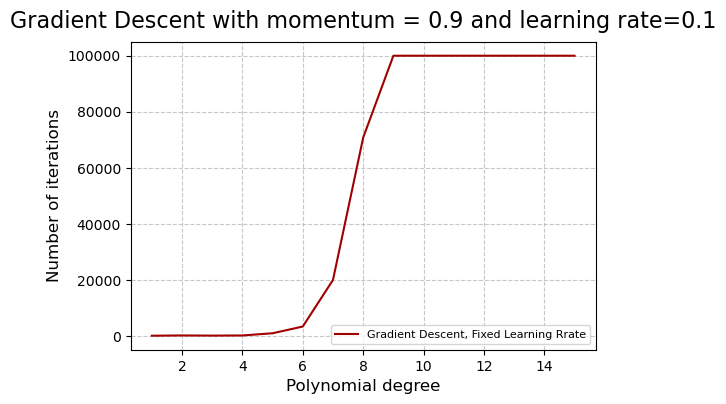

In [52]:
### Plotting results
degrees = np.arange(1, deg_max+1)

plt.figure()
plt.plot(degrees, MSE_closed_form, label="MSE with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gradient_descent, label="MSE with parameters found with gradient descent with momentum", color='#FF6F61', linewidth=1.5)
plt.title("MSE with Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/mse_closed_form_and_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_form, label="R2-score with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_score_gradient_descent, label="R2-with parameters found with gradient descent with momentum", color='#FF6F61', linewidth=1.5)
plt.title("R2-score Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/r2_closed_form_and_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, num_iterations, label="Gradient Descent, Fixed Learning Rrate", color='#A10000', linewidth=1.5)
plt.title(f"Gradient Descent with momentum = {mom} and learning rate={eta}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/number_of_iterations_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

## Testing gradient descent with momentum, Ridge

In [53]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 12
lam = 0.001
eta = 1e-3
mom = 0.7

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, num_iters=1000000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.02823618 -2.08576086  0.17182996  5.82179977 -0.3070672  -6.08008585
  0.11380604  0.29486048  0.13120644  3.30749742 -0.08163043 -1.49280155]
Number of iterations: 858115
Closed-form Ridge coefficients:  [-0.02823547 -2.0857958   0.17182606  5.82212846 -0.30706498 -6.08124119
  0.1138234   0.2967647   0.13117538  3.30600763 -0.0816156  -1.49235448]
GD parameters equal to closed-form parameters: [ True  True  True  True  True  True  True False  True  True  True  True].
Tolerance = 0.001


## Calculating parameters, gradient descent with momentum, Ridge

In [54]:
# Prepare data:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)
# Set paramters
p = 12
mom = 0.9
lambdas = np.logspace(-4, 2,20)
# lambdas = [1e-5, 1e-3, 1e-2, 1e-1, 1, 10]
n = len(lambdas)
eta = 1e-3
MSE_closed_ridge = []
MSE_gd_momentum_ridge =[]
R2_score_closed_ridge = []
R2_score_gd_momentum_ridge = []
num_iterations_momentum_ridge = []

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

y_offset = np.mean(y_train)

for l in lambdas:
    beta_closed = Ridge_parameters(X_train_s, y_train, l)
    beta_gd, t = momentum_gradient_descent_Ridge(X_train_s, y_train, lam=l, eta=eta, momentum=mom, num_iters=100000)
    num_iterations_momentum_ridge.append(t)
    
    y_pred_closed = X_test_s@beta_closed + y_offset
    y_pred_gd = X_test_s @ beta_gd + y_offset
    
    MSE_closed_ridge.append(mean_squared_error(y_true=y_test, y_pred=y_pred_closed))
    MSE_gd_momentum_ridge.append(mean_squared_error(y_true=y_test, y_pred=y_pred_gd))
    
    R2_score_closed_ridge.append(r2_score(y_true=y_test, y_pred=y_pred_closed))
    R2_score_gd_momentum_ridge.append(r2_score(y_true=y_test, y_pred=y_pred_gd))
    is_close = np.isclose(beta_gd, beta_closed, rtol=tol, atol=tol)

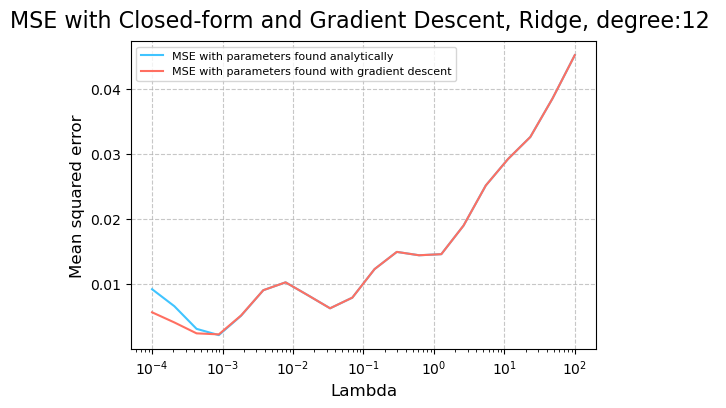

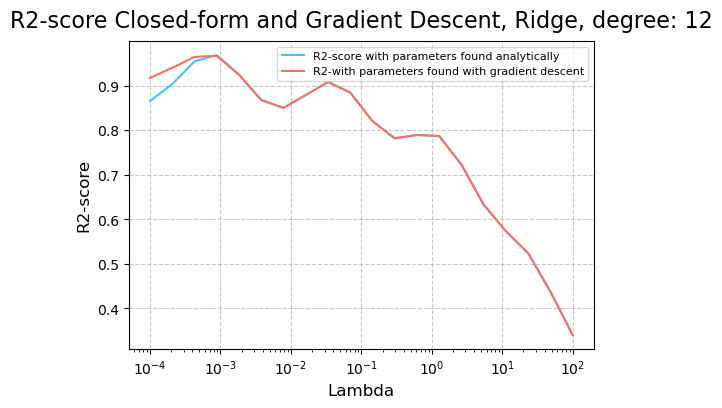

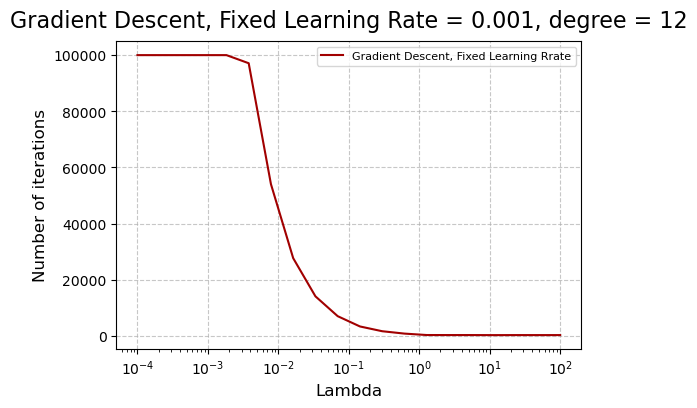

In [ ]:
"""
### Plotting results

plt.figure()
plt.plot(lambdas, MSE_closed_ridge, label="MSE with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_momentum_ridge, label="MSE with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title(f"MSE with Closed-form and Gradient Descent, Ridge, degree:{p} ", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/mse_closed_form_and_gradient_descent_Ridge.pdf", bbox_inches="tight")
plt.show()

plt.plot(lambdas, R2_score_closed_ridge, label="R2-score with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, R2_score_gd_momentum_ridge, label="R2-with parameters found with gradient descent", color='#FF6F61', linewidth=1.5)
plt.title(f"R2-score Closed-form and Gradient Descent, Ridge, degree: {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/r2_closed_form_and_gradient_descent_RIDGE.pdf", bbox_inches="tight")
plt.show()

plt.plot(lambdas, num_iterations_momentum_ridge, label="Gradient Descent, Fixed Learning Rrate", color='#A10000', linewidth=1.5)
plt.title(f"Gradient Descent, Fixed Learning Rate = {eta}, degree = {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/number_of_iterations_gradient_descent_ridge.pdf", bbox_inches="tight")
plt.show()
"""

## Testing Gradient descent with ADAGrad, OLS

In [65]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 9

eta = 1e-1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta=eta, num_iters=1000000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02339353 -2.17028882  0.1294631   6.18427017 -0.14624537 -7.11689734
 -0.08843428  2.87452131  0.13329218]
Number of iterations: 1000000
Closed-form OLS coefficients:  [-0.0225844  -2.17035032  0.12193737  6.18488693 -0.12361183 -7.11824041
 -0.11534704  2.87533016  0.14434382]
GD parameters equal to closed-form parameters: [ True  True False  True False  True False  True False].
Tolerance = 0.001


## Calculating parameters, gradient descent with ADAGrad, OLS

In [67]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables, lists:
deg_max = 15
MSE_closed_ols = []
MSE_gd_ADAGrad_ols = []
R2_score_closed_ols=[]
R2_score_gd_ADAGrad_ols = []
num_iterations_ADAGrad_ols = []
eta = 1e-1

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    beta_gd, t = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta = eta, num_iters=100000)
    num_iterations_ADAGrad_ols.append(t)
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Add to predictions
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd = X_test_s @ beta_gd + y_offset
    
    # Append MSEs
    MSE_closed_ols.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_ADAGrad_ols.append(mean_squared_error(y_test, y_pred_gd))
    
    # Append R2 scores
    R2_score_closed_ols.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_score_gd_ADAGrad_ols.append(r2_score(y_true=y_test, y_pred = y_pred_gd))

In [70]:
"""
### Plotting results
degrees = np.arange(1, deg_max+1)

plt.figure()
plt.plot(degrees, MSE_closed_ols, label="MSE with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAGrad_ols, label="MSE with parameters found with gradient descent with adagrad", color='#FF6F61', linewidth=1.5)
plt.title("MSE with Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/mse_closed_form_and_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_ols, label="R2-score with parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_score_gd_ADAGrad_ols, label="R2-with parameters found with gradient descent with momentum", color='#FF6F61', linewidth=1.5)
plt.title("R2-score Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/r2_closed_form_and_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, num_iterations_ADAGrad_ols, label="Gradient Descent, Fixed Learning Rrate", color='#A10000', linewidth=1.5)
plt.title(f"Gradient Descent with ADAGRad and learning rate={eta}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/number_of_iterations_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()
"""

'\n### Plotting results\ndegrees = np.arange(1, deg_max+1)\n\nplt.figure()\nplt.plot(degrees, MSE_closed_ols, label="MSE with parameters found analytically", color=\'#40C4FF\', linewidth=1.5)\nplt.plot(degrees, MSE_gd_ADAGrad_ols, label="MSE with parameters found with gradient descent with adagrad", color=\'#FF6F61\', linewidth=1.5)\nplt.title("MSE with Closed-form and Gradient Descent, OLS", fontsize=16, fontfamily=\'sans-serif\', pad=10)\nplt.ylabel("Mean squared error", fontsize=12, fontfamily=\'sans-serif\')\nplt.xlabel("Polynomial degree", fontsize=12, fontfamily=\'sans-serif\')\nplt.legend(fontsize=8)\nplt.grid(True, linestyle=\'--\', alpha=0.7)\nfig = plt.gcf()\nfig.set_size_inches(6, 4)\n# plt.savefig("Plots/mse_closed_form_and_gradient_descent_momentum_ols.pdf", bbox_inches="tight")\nplt.show()\n\nplt.plot(degrees, R2_score_closed_ols, label="R2-score with parameters found analytically", color=\'#40C4FF\', linewidth=1.5)\nplt.plot(degrees, R2_score_gd_ADAGrad_ols, label="R2-wi

## Testing GD with ADAGrad, Ridge

In [109]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 15
lam = 0.01
eta = 1e-1


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, num_iters=1000000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.036274   -1.53552815  0.1490728   2.81716857 -0.11213326 -1.06237472
 -0.06866994 -0.98760398  0.01392273  0.00782241  0.02757211  0.45913029
  0.00959182  0.077084    0.02205183]
Number of iterations: 286116
Closed-form Ridge coefficients:  [-0.03626942 -1.53567779  0.14905128  2.81798351 -0.11207829 -1.06352601
 -0.06879667 -0.98778649  0.01400757  0.00861821  0.02764291  0.45965183
  0.00958665  0.07642972  0.02198606]
GD parameters equal to closed-form parameters: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True].
Tolerance = 0.001


## Calculating parameters

In [ ]:
# Test, GD with RMSProp, OLS:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=10000, print_num_iters=True)
print("Vanlig GD: ", beta)

beta_RMSProp = RMSProp_gradient_descent_OLS(X_train_s, y_train, eta=0.001, num_iters=50000, print_num_iters=True)
print("GD with RMSProp: ", beta_RMSProp)

beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)


Number of iterations:  9436
Vanlig GD:  [-0.05363074 -0.70385857  0.12499872  0.5082594  -0.0711554 ]
Number of iterations:  182
GD with RMSProp:  [-0.02358403 -0.02836852 -0.01701469 -0.02791811  0.02870415]
Closed-form OLS coefficients:  [-0.05363465 -0.70385875  0.12501007  0.50825947 -0.07116328]


In [ ]:
# Test, GD with RMSProp, Ridge:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

beta = gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=10000, print_num_iters=True)
print("Vanlig GD: ", beta)
beta_RMSProp = RMSProp_gradient_descent_Ridge(X_train_s, y_train, eta=0.001, num_iters=6000, print_num_iters=True)
print("GD with RMSProp ", beta_RMSProp)
beta_closed = Ridge_parameters(X_train_s, y_train)
print("Closed-form Ridge coefficients: ", beta_closed)

Number of iterations:  3294
Vanlig GD:  [-0.03040138 -0.55497486  0.03348572  0.36136473 -0.00513236]
Number of iterations:  6000
GD with RMSProp  [-0.03090265 -0.55447492  0.0329894   0.36186476 -0.00563492]
Closed-form Ridge coefficients:  [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]


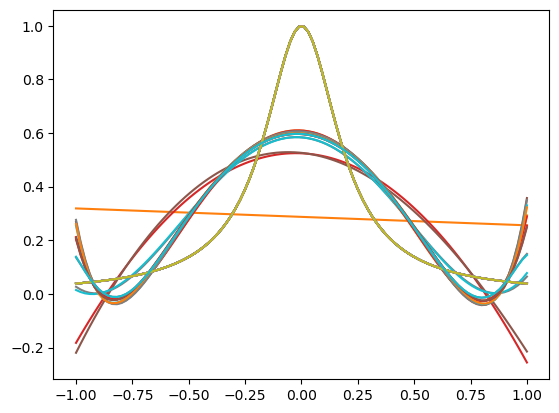

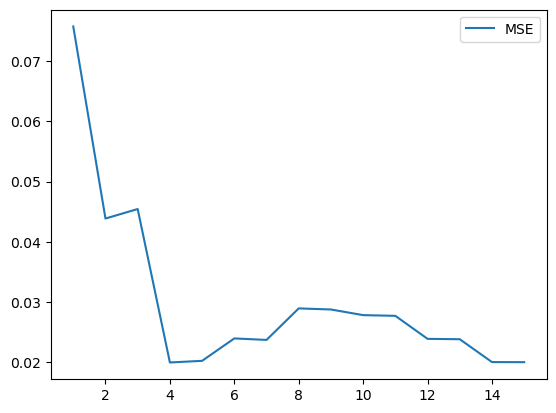

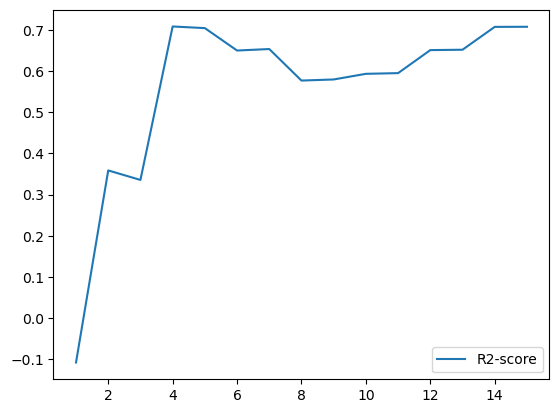

In [ ]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

deg_max = 15
MSE=[]
R2_score= []
for p in range(1, deg_max+1):
    X_plot = polynomial_features(x, p, intercept=True)
    X_train = polynomial_features(x_train, p, intercept=True)
    X_test  = polynomial_features(x_test, p, intercept=True)

    scaler = StandardScaler()
    scaler.fit(X_train[:, 1:])

    X_train_s = np.hstack([X_train[:, [0]], scaler.transform(X_train[:, 1:])])
    X_test_s  = np.hstack([X_test[:,  [0]], scaler.transform(X_test[:,  1:])])
    X_plot_s  = np.hstack([X_plot[:,  [0]], scaler.transform(X_plot[:,  1:])])
    
    beta = gradient_descent_OLS(X_train_s, y_train)
    y_pred = X_test_s @ beta
    MSE.append(mean_squared_error(y_test, y_pred))
    R2_score.append(r2_score(y_true=y_test, y_pred=y_pred))
    plt.plot(x, y)
    plt.plot(x, X_plot_s@beta)
plt.show()   
degrees = np.arange(1, deg_max+1)
plt.plot(degrees, MSE, label="MSE")
plt.legend()
plt.show()
plt.plot(degrees, R2_score, label="R2-score")
plt.legend()
plt.show()